# ORIE 5355/INFO 5370 HW 3: Algorithmic Pricing

 - Name: Joy Wang
 - Net-id: zw673
 - Date: Oct 4th
 - Late days used for this assignment: 0
 - Total late days used (counting this assignment): 1
 - People with whom you discussed this assignment: 

After you finish the homework, please complete the following (short, anonymous) post-homework survey: https://forms.gle/NYYpiyK1XoqzrNzY8 and include the survey completion code below.

### Question 0 [1 point]
<font color='blue'> Survey completion code: hw3_2021xyz

We have marked questions in <font color='blue'> blue </font>. Please put answers in black (do not change colors). You'll want to write text answers in "markdown" mode instead of code. In Jupyter notebook, you can go to Cell > Cell Type > Markdown, from the menu. Please carefully read the late days policy and grading procedure [here](https://orie5355.github.io/Fall_2021/assignments/). 

# Conceptual component [4 points]

Please complete the following pricing ethics scenario questionaire: https://forms.gle/7XFdDMQbtDqw6yCx5, and include the survey completion code below. **We will discuss these issues in class on 10/4. You must complete the questionaire before the day of that class, even if you turn in the rest of the homework later. The questionaire will close the morning of the class that we discuss these issues.**

<font color='blue'> Survey completion code: hw3_pricingethics_2021

hw3_pricingethics_2021

<font color='blue'> Based on the first letter of your first name, explain your answers to the following questions, in at most three sentences each.

First letter A-C: 1, 6, 11, 16

First letter D-H: 2, 7, 12, 17

First letter I-M: 3, 8, 13, 18

First letter N-S: 4, 9, 14, 19

First letter T-Z: 5, 10, 15, 20


<font color='blue'> 

Give and discuss your answers for the 4 questions in this notebook, to be turned in with the rest of the homework. Also be prepared to discuss your answers to at least these questions in class (I might randomly call on people), but you should also be willing/able to discuss your answers to other questions. 

3: It's a little unfair since the community is experiencing recession with substantial unemployment, decreasing wages and salaries will lead people living in this community live more difficultly.

8: It's acceptable. Firstly, the community is not any different socio-economically than others, so there isn't any humanitarian issue. Secondly, since there isn't competition, within free market, it's acceptable that the prices are a little higher (5% is not too many).

13: That's unfair. The neighborhood is a socioeconomially disadvantaged neighborhood, setting higher prices of essential items for them is detrimental to social justice. Essential items are those people cannot live with, so this action forces poor people pay more, which is nonsense.

18：That's unfair. It deprives disadvantaged people of equal access to taxis and makes transportation more inconvenient for people living in remote areas.

# Programming component

## Helper code

In [1]:
import numpy as np
import pandas as pd
import os, sys, math
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('HW3_data_train.csv')
test_demand_curve = pd.read_csv('test_demand.csv')

In [3]:
df_train.head()

,Location,Income,Offered price,Purchased
0,Africa,10.38,3.16,False
1,Europe,26.33,3.47,True
2,Europe,24.06,3.78,True
3,Africa,16.18,3.74,False
4,Asia Pacific,13.73,4.75,False


In [4]:
df_train.shape, test_demand_curve.shape

((4000, 4), (199, 5))

## Problem 1: Demand estimation and pricing without covariates

First, we will use the training data to construct estimates of the demand at each price without leveraging the covariates, and then use that estimated function to calculate optimal prices. 

### 1a) Naive method: empirical estimate of demand $d(p)$ at each price

<font color='blue'> Fill in the below function, that takes in a dataframe and the number of bins into which to separate the historical prices. The function should output a dataframe that has one row for each price bin, with two columns: the bin interval, and the estimated demand $d(p)$ (the fraction of potential customers who purchase at price $p$) in that bin.  
    
Use the following function to create bins:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html

In [5]:
# Example with 10 bins:
df_train['bin_with_10_bins'] = pd.qcut(df_train['Offered price'], 10)
df_train.head()

,Location,Income,Offered price,Purchased,bin_with_10_bins
0,Africa,10.38,3.16,False,"(2.95, 3.54]"
1,Europe,26.33,3.47,True,"(2.95, 3.54]"
2,Europe,24.06,3.78,True,"(3.54, 4.19]"
3,Africa,16.18,3.74,False,"(3.54, 4.19]"
4,Asia Pacific,13.73,4.75,False,"(4.19, 4.77]"


For example, with 2 bins and passing in df_train to the function, you should see the following output:

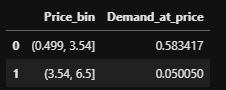

(If you can't see the image, then it is an image with 2 columns (Price_bin and Demand_at_price), and two rows. The First row has price bin (.499, .354] and Demand_at_price equal to .583.)

In [6]:
def create_empirical_estimate_demand_df(df, number_of_pricing_bins):
    df = df.loc[:, :]  
    df['bin_with_bins'] = pd.qcut(df['Offered price'], number_of_pricing_bins)
    unique_values = sorted(df['bin_with_bins'].unique())

    dic_bins = {}
    for bins in unique_values:
        filtered_rows = df[(df['bin_with_bins'] == bins) & (df['Purchased'] == True)]
        ratio = len(filtered_rows) / len(df[df['bin_with_bins'] == bins])
        dic_bins[bins] = ratio

    Demand_at_price_naive = pd.DataFrame(dic_bins.items(), columns=['Price_bin', 'Demand_at_price'])
    return Demand_at_price_naive

In [7]:
Demand_at_price_naive_with_2bins=create_empirical_estimate_demand_df(df_train, 2)

<font color='blue'> Fill in the below function, that takes in a single price and your empirical df from the above function and outputs the prediction for the demand $d(p)$ at that price. For example, with 2 bins, at price = 3 the function should output 0.583417.

If the price is lower than the smallest bin, then use the value of the smallest bin. If it is higher than the highest bin, use the value of the highest bin.

In [8]:
def get_prediction_empirical(empirical_df, price):
    for i in range(len(empirical_df["Price_bin"])):
        if price <= empirical_df["Price_bin"][i].right and price >empirical_df["Price_bin"][i].left:
            return empirical_df["Demand_at_price"][i]
    if price>empirical_df["Price_bin"][len(empirical_df["Price_bin"])-1].right:
        return empirical_df["Demand_at_price"][len(empirical_df["Price_bin"])-1]
    elif price<=empirical_df["Price_bin"][0].left:
        return empirical_df["Demand_at_price"][0]


In [9]:
get_prediction_empirical(Demand_at_price_naive_with_2bins, 3)

0.5834165834165834

In [10]:
prices_to_predict = np.linspace(min(df_train['Offered price']), max(df_train['Offered price']), 200)

<font color='blue'> Plot in a single figure the outputs of your function as a line plot -- where the X axis corresponds to prices in `prices_to_predict` and the Y axis the predicted Demand at that price -- for the following three inputs to the function:
    
    1. the dataframe is the first 100 rows of df_train, with 10 bins.
    
    2. the dataframe is the first 500 rows of df_train, with 10 bins.
    
    3. the dataframe is all the rows of df_train, with 10 bins.

<font color='blue'> In the same figure, include the "true" test-time demand curve, using `test_demand_curve` that we loaded at the top of the homework -- plot the mid-point of each bin on the X axis, and the demand for that bin on the Y axis. So your plot will contain 4 curves in total.


C:\Users\Zhuxu\AppData\Local\Temp\ipykernel_19108\816281019.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bin_with_bins'] = pd.qcut(df['Offered price'], number_of_pricing_bins)
C:\Users\Zhuxu\AppData\Local\Temp\ipykernel_19108\816281019.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bin_with_bins'] = pd.qcut(df['Offered price'], number_of_pricing_bins)


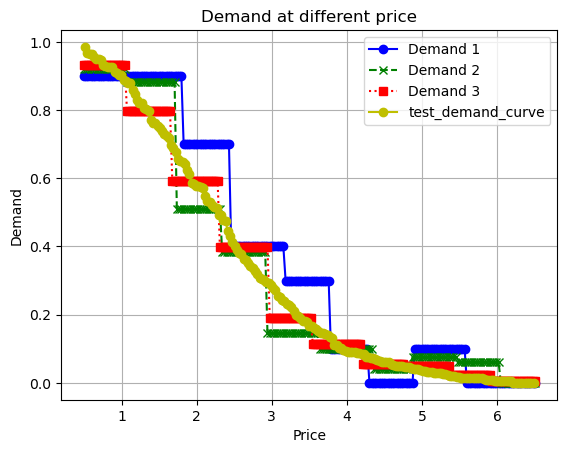

In [11]:
import matplotlib.pyplot as plt
Demand_at_price_naive_with_10bins_100=create_empirical_estimate_demand_df(df_train.head(100), 10)
Demand_at_price_naive_with_10bins_500=create_empirical_estimate_demand_df(df_train.head(500), 10)
Demand_at_price_naive_with_10bins_all=create_empirical_estimate_demand_df(df_train, 10)
Demand_naive1=[]
Demand_naive2=[]
Demand_naive3=[]
for price in prices_to_predict:
    Demand_naive1.append(get_prediction_empirical(Demand_at_price_naive_with_10bins_100, price))
    Demand_naive2.append(get_prediction_empirical(Demand_at_price_naive_with_10bins_500, price))
    Demand_naive3.append(get_prediction_empirical(Demand_at_price_naive_with_10bins_all, price))

    
plt.plot(prices_to_predict, Demand_naive1, marker='o', linestyle='-', color='b', label='Demand 1') 
plt.plot(prices_to_predict, Demand_naive2, marker='x', linestyle='--', color='g', label='Demand 2')
plt.plot(prices_to_predict, Demand_naive3, marker='s', linestyle=':', color='r', label='Demand 3')
plt.plot(test_demand_curve["Price_bin_mid"], test_demand_curve["Demand_at_price"], marker='o', linestyle='-', color='y', label='test_demand_curve') 

plt.xlabel('Price')  
plt.ylabel('Demand') 
plt.title('Demand at different price') 
plt.legend() 

plt.grid(True) 
plt.show() 


<font color='blue'> Do the same plot, except now you're using 50 bins for each of the three data frames.

C:\Users\Zhuxu\AppData\Local\Temp\ipykernel_19108\816281019.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bin_with_bins'] = pd.qcut(df['Offered price'], number_of_pricing_bins)
C:\Users\Zhuxu\AppData\Local\Temp\ipykernel_19108\816281019.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bin_with_bins'] = pd.qcut(df['Offered price'], number_of_pricing_bins)


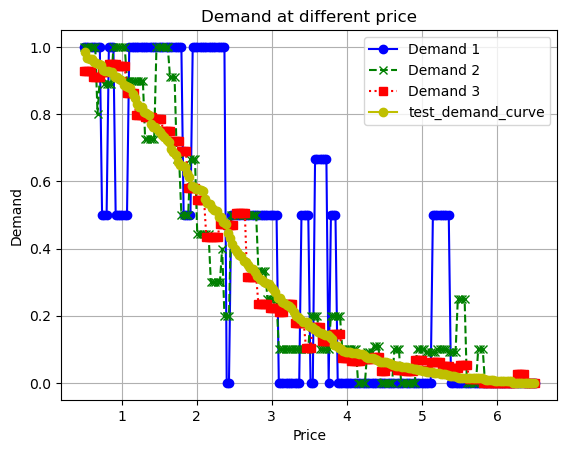

In [12]:
import matplotlib.pyplot as plt
Demand_at_price_naive_with_50bins_100=create_empirical_estimate_demand_df(df_train.head(100), 50)
Demand_at_price_naive_with_50bins_500=create_empirical_estimate_demand_df(df_train.head(500), 50)
Demand_at_price_naive_with_50bins_all=create_empirical_estimate_demand_df(df_train, 50)
Demand_naive1_50bins=[]
Demand_naive2_50bins=[]
Demand_naive3_50bins=[]
for price in prices_to_predict:
    Demand_naive1_50bins.append(get_prediction_empirical(Demand_at_price_naive_with_50bins_100, price))
    Demand_naive2_50bins.append(get_prediction_empirical(Demand_at_price_naive_with_50bins_500, price))
    Demand_naive3_50bins.append(get_prediction_empirical(Demand_at_price_naive_with_50bins_all, price))

    
plt.plot(prices_to_predict, Demand_naive1_50bins, marker='o', linestyle='-', color='b', label='Demand 1') 
plt.plot(prices_to_predict, Demand_naive2_50bins, marker='x', linestyle='--', color='g', label='Demand 2')
plt.plot(prices_to_predict, Demand_naive3_50bins, marker='s', linestyle=':', color='r', label='Demand 3')
plt.plot(test_demand_curve["Price_bin_mid"], test_demand_curve["Demand_at_price"], marker='o', linestyle='-', color='y', label='test_demand_curve') 

plt.xlabel('Price')  
plt.ylabel('Demand') 
plt.title('Demand at different price') 
plt.legend() 

plt.grid(True) 
plt.show() 

<font color='blue'> Comment on your output in no more than 3 sentences. What is the effect of using more data and more bins?

Using more data and more data bins results in more accurate curves. However, when there is insufficient data, more bins will cause large fluctuations, as shown in the curve of demand1 in Figure 2.

### 1b) Demand estimation using logistic regression

<font color='blue'> First, Fill in the below function that fits a logistic regression to predict the probability of purchase at a price ($d(p)$). The logistic regression should just have two coefficients: one for the intercept, and one for the price. The function takes in a dataframe that you will use as your training data for your model, and should return your fitted model. 

Note: the "intercept" term corresponds to a column of all 1s in your dataframe. If you do logistic regression in statsmodels, you can have it add the intercept term for you if you use the formula feature. In sklearn, there is a parameter called fit_intercept. 

In [13]:
from sklearn.linear_model import LogisticRegression
def fit_logistic_regression_demand_just_on_price(df):

    X=df["Offered price"]
    X = X.values.reshape(-1, 1) 
    y=df["Purchased"]
    y = [1 if val == True else 0 for val in y]
    LRM=LogisticRegression(fit_intercept=True)
    LRM.fit(X,y)
    return LRM
    

<font color='blue'> Fill in the below function, that takes in a single price and your trained model and outputs the prediction for the demand $d(p)$ at that price.

Note that you do not want to treat logistic regression as a binary classifier that outputs either 0 or 1. Rather, you want to get the probability of being a 1. You can extract this using the predict_proba(X) function. 

In [14]:
def get_prediction_logistic(fitted_model, price):
    return fitted_model.predict_proba(price)[:,1]

<font color='blue'> For each of the three training dataframes as in part A, fit a model and get the predictions for each of the prices in `prices_to_predict` using your above function. Generate the same lineplot as above. Also include the "true" test-time demand curve, `test_demand_curve`. 

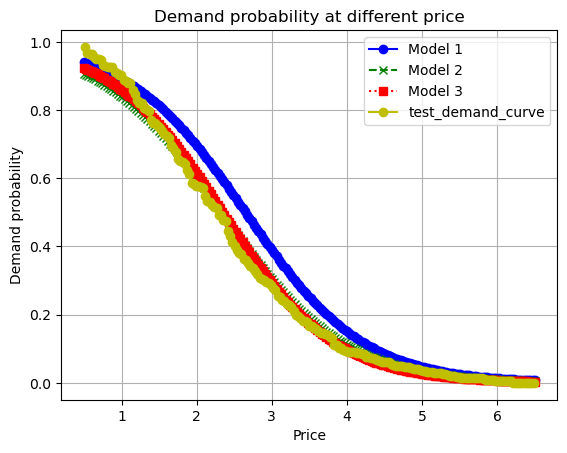

In [15]:
model1=fit_logistic_regression_demand_just_on_price(df_train.head(100))
model2=fit_logistic_regression_demand_just_on_price(df_train.head(500))
model3=fit_logistic_regression_demand_just_on_price(df_train)
y1=[]
y2=[]
y3=[]
for price in prices_to_predict:
    price=price.reshape(-1,1)
    #print(get_prediction_logistic(model1, price))
    y1.append(get_prediction_logistic(model1, price))
    y2.append(get_prediction_logistic(model2, price))
    y3.append(get_prediction_logistic(model3, price))

plt.plot(prices_to_predict, y1, marker='o', linestyle='-', color='b', label='Model 1') 
plt.plot(prices_to_predict, y2, marker='x', linestyle='--', color='g', label='Model 2')
plt.plot(prices_to_predict, y3, marker='s', linestyle=':', color='r', label='Model 3')
plt.plot(test_demand_curve["Price_bin_mid"], test_demand_curve["Demand_at_price"], marker='o', linestyle='-', color='y', label='test_demand_curve') 

plt.xlabel('Price')  
plt.ylabel('Demand probability') 
plt.title('Demand probability at different price') 
plt.legend() 

plt.grid(True) 
plt.show() 

<font color='blue'> Comment on your output in no more than 3 sentences. What is the effect of using logistic regression instead of the empirical distribution? 

Stable and precise estimates can be made with less data using logistic regression instead of the empirical distribution.
Using logistic regression helps get a smoother prediction model.

### 1c) Optimal pricing using your demand estimates

<font color='blue'> Fill in the following function that takes in two lists: a list of prices, and a list of predicted demand d(p) at that price. The function outputs the revenue maximizing price given the data and the corresponding revenue. You may use a "brute force" technique, that loops through all the possible prices and calculates the revenue using that price. 

In [16]:
def get_revenue_maximizing_price_and_revenue(price_options, demand_predictions):
    max_revenue=0
    max_p=0
    max_d=0
    for i in range(len(price_options)):
        p=price_options[i]
        d=demand_predictions[i]
        if p*d>max_revenue:
            max_revenue=p*d
            max_p=p
            max_d=d
                
    return max_p,max_revenue

<font color='blue'> Print out the optimal price and the predicted optimal revenue from the predictions for your naive and logistic models, using 100 rows and all the data, each. 

For example, we got the following:

logistic, 100 points:  2.580402010050251 1.2143341610705582

naive, all points:  2.278894472361809 1.348157868550674

Note: last year, people reported different numbers for the logistic regression based on the exact package they used (which might, for example, have different default solvers or default parameters. If you get a different number, that's fine, as long as your methods are correct.) For example, with scikit-learn, people last year reported getting: (2.1884422110552766, 1.4070878495510661) for the logistic regression with 100 rows. 

In [17]:
#naive 100
naive_100_p,naive_100_r=get_revenue_maximizing_price_and_revenue(prices_to_predict, Demand_naive1)
print(naive_100_p,naive_100_r)

#naive all
naive_all_p,naive_all_r=get_revenue_maximizing_price_and_revenue(prices_to_predict, Demand_naive3)
print(naive_all_p,naive_all_r)

#logistic 100
logistic_100_p,logistic_100_r=get_revenue_maximizing_price_and_revenue(prices_to_predict, y1)
print(logistic_100_p,logistic_100_r)

#logistic all
logistic_all_p,logistic_all_r=get_revenue_maximizing_price_and_revenue(prices_to_predict, y3)
print(logistic_all_p,logistic_all_r)

2.42964824120603 1.700753768844221
2.278894472361809 1.348157868550674
2.1884422110552766 [1.40708785]
1.9773869346733668 [1.22954805]


<font color='blue'> Now, we're going to use the "true" test-time demand curve, `test_demand_curve`. For each of the above predicted optimal prices, calculate the revenue resulting from that price used on the true demand curve. Also print out the true optimal price and corresponding revenue for that curve.  

For example, we got:

true revenue using logistic 100 price:  0.9729384628058323

(Again, you might get a slightly different number, depending on how you implemented your code. That's OK.)

In [18]:
import pandas as pd
def output_true_demand(price):
    for i in range(len(test_demand_curve["Price_bin"])):
        if price > test_demand_curve["Price_bin"][i].left and price<=test_demand_curve["Price_bin"][i].right:
            return test_demand_curve["Demand_at_price"][i]
    if price<=test_demand_curve["Price_bin"][0].left:
        return test_demand_curve["Demand_at_price"][0]
    elif price>test_demand_curve["Price_bin"][len(test_demand_curve["Price_bin"])-1].right:
        return test_demand_curve["Demand_at_price"][len(test_demand_curve["Price_bin"])-1]

for i in range(len(test_demand_curve["Price_bin"])):
    test_demand_curve["Price_bin"][i]=pd.Interval(float(test_demand_curve["Price_bin"][i].strip("[]()").split(",")[0]),float(test_demand_curve["Price_bin"][i].strip("[]()").split(",")[1]))
print("true revenue using naive 100 price:",output_true_demand(naive_100_p)*naive_100_p)
print("true revenue using naive all price:",output_true_demand(naive_all_p)*naive_all_p)
print("true revenue using logistic 100 price:",output_true_demand(logistic_100_p)*logistic_100_p)
print("true revenue using logistic all price:",output_true_demand(logistic_all_p)*logistic_all_p)

true revenue using naive 100 price: 1.082112241881677
true revenue using naive all price: 1.1655414476964976
true revenue using logistic 100 price: 1.141795936202753
true revenue using logistic all price: 1.1413105797443595


C:\Users\Zhuxu\AppData\Local\Temp\ipykernel_19108\1089235298.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_demand_curve["Price_bin"][i]=pd.Interval(float(test_demand_curve["Price_bin"][i].strip("[]()").split(",")[0]),float(test_demand_curve["Price_bin"][i].strip("[]()").split(",")[1]))


In [19]:
get_revenue_maximizing_price_and_revenue(test_demand_curve["Price_bin_right"], test_demand_curve["Demand_at_price"])

(2.098, 1.2008289473684208)

<font color='blue'> How do your estimates compare to the actual revenue? Discuss in no more than 3 sentences. 

Using logistic regression model with all data gets the most accurate prediction on maximum revenue while the prediction using naive model with 100 data is farthest from the true value.

# Problem 2: Demand estimation and pricing with covariates 

Now, we are going to ask you to do personalized pricing, based on just a two binarized covariates. 

First, take `df_train` and create a new column for "low" and "high" wealth, based on if the income level is above or below the median income level. Second, create a new column for Location: `1` if the location is either America, and `0` if the location is anything else.

For this section, we will use all the df_train data, as opposed to just the first few rows.

In [20]:
median_income = df_train['Income'].median()
df_train['LowWealth'] = df_train['Income'].apply(lambda x: 1 if x <= median_income else 0)

df_train['IsAmerica'] = df_train['Location'].apply(lambda x: 1 if x == 'America' else 0)

print(df_train)

          Location  Income  Offered price  Purchased bin_with_10_bins  \
0           Africa   10.38           3.16      False     (2.95, 3.54]   
1           Europe   26.33           3.47       True     (2.95, 3.54]   
2           Europe   24.06           3.78       True     (3.54, 4.19]   
3           Africa   16.18           3.74      False     (3.54, 4.19]   
4     Asia Pacific   13.73           4.75      False     (4.19, 4.77]   
...            ...     ...            ...        ...              ...   
3995       America   31.29           2.49       True     (2.29, 2.95]   
3996       America   17.72           3.07       True     (2.95, 3.54]   
3997        Europe   14.25           1.42       True     (1.05, 1.66]   
3998        Europe   39.63           6.07      False      (5.91, 6.5]   
3999  Asia Pacific    3.75           3.20      False     (2.95, 3.54]   

       bin_with_bins  LowWealth  IsAmerica  
0       (3.07, 3.18]          0          0  
1       (3.44, 3.54]          0  

### 2a) Demand estimation

<font color='blue'> First, Fill in the below function that fits a logistic regression to predict the probability of purchase at a price ($d(p)$). The logistic regression should now have more coefficients than before: 1 for each covariate, and any interactions (including interactions between price and covariates) that you wish to add. If you add more interactions, you may wish to add regularization. 

In [21]:
from sklearn.linear_model import LogisticRegression
def fit_logistic_regression_demand_with_covariates(df):
    X=df[["Offered price","IsAmerica","LowWealth"]]
    y=df["Purchased"]
    y = [1 if val == True else 0 for val in y]
    LRM=LogisticRegression(fit_intercept=True)
    LRM.fit(X,y)
    return LRM

    

<font color='blue'> Fill in the below function, that takes in a single price, covariates, and your trained model, and outputs the prediction for the demand $d(p)$ at that price. For example, one of the covariate inputs to the function can be `['NotAmerica', 'LowWealth']`.

In [22]:
def get_prediction_logistic(fitted_model, price, covariates):
    features=[price]
    for i in range(len(covariates)):
        features.append(covariates[i])
    return fitted_model.predict_proba([features])[:1]

In [23]:
model_test=fit_logistic_regression_demand_with_covariates(df_train)
get_prediction_logistic(model_test, 1.314070, [0,1])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.44142429, 0.55857571]])

In [24]:
test_demand_curve_America_HighWealth = pd.read_csv('test_demand_America_HighWealth.csv')
test_demand_curve_NotAmerica_HighWealth = pd.read_csv('test_demand_NotAmerica_HighWealth.csv')
test_demand_curve_America_LowWealth = pd.read_csv('test_demand_America_LowWealth.csv')
test_demand_curve_NotAmerica_LowWealth = pd.read_csv('test_demand_NotAmerica_LowWealth.csv')

<font color='blue'> Fit a model and get the predictions for each of the prices in `prices_to_predict` using your above function and each unique covariate combination.


<font color='blue'> For each covariate combination, generate the same lineplot as in 1a and 1b (separately for each covariate combination). Also include the "true" test-time demand curve for the appropriate covariate combination 

For example, for `NotAmerica_LowWealth`, we got (again, your answers may differ slightly):

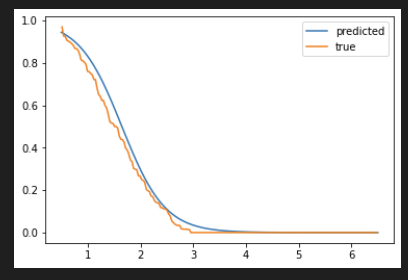

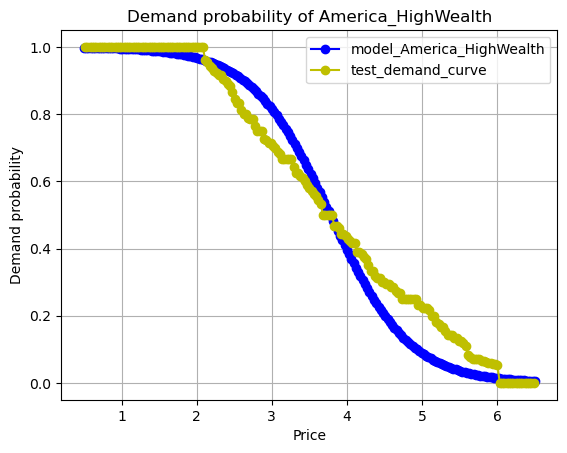

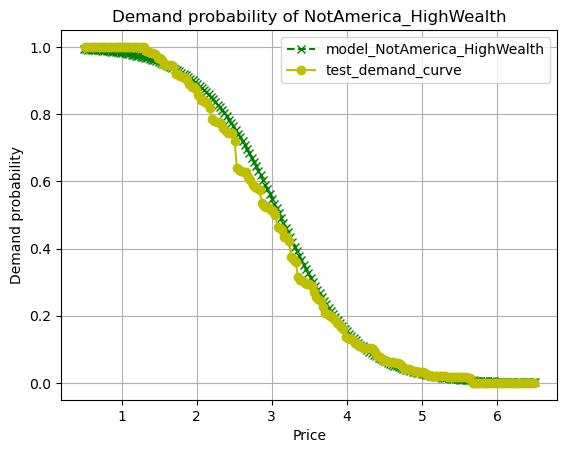

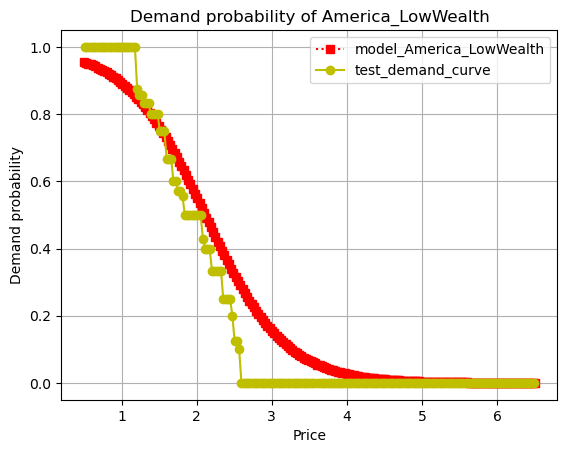

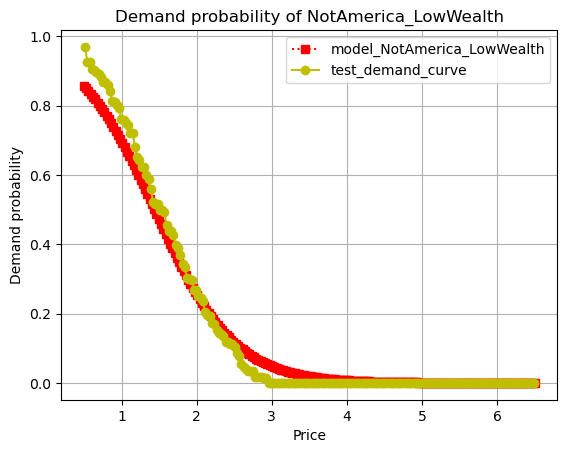

In [27]:
model_America_HighWealth=fit_logistic_regression_demand_with_covariates(df_train)
model_NotAmerica_HighWealth=fit_logistic_regression_demand_with_covariates(df_train)
model_America_LowWealth=fit_logistic_regression_demand_with_covariates(df_train)
model_NotAmerica_LowWealth=fit_logistic_regression_demand_with_covariates(df_train)
y_AH=[]
y_NAH=[]
y_AL=[]
y_NAL=[]
for price in prices_to_predict:
    '''
    price_co_AH=[[price,1,0]]
    price_co_NAH=[[price,0,0]]
    price_co_AL=[[price,1,1]]
    price_co_NAL=[[price,0,1]]
    '''
    y_AH.append(get_prediction_logistic(model_America_HighWealth, price,[1,0]))
    y_NAH.append(get_prediction_logistic(model_NotAmerica_HighWealth, price,[0,0]))
    y_AL.append(get_prediction_logistic(model_America_LowWealth, price,[1,1]))
    y_NAL.append(get_prediction_logistic(model_NotAmerica_LowWealth, price,[0,1]))
y_AH = [item[0][1] for item in y_AH]
y_NAH = [item[0][1] for item in y_NAH]
y_AL = [item[0][1] for item in y_AL]
y_NAL = [item[0][1] for item in y_NAL]

plt.plot(prices_to_predict, y_AH, marker='o', linestyle='-', color='b', label='model_America_HighWealth') 
plt.plot(test_demand_curve_America_HighWealth["Price_bin_mid"], test_demand_curve_America_HighWealth["Demand_at_price"], marker='o', linestyle='-', color='y', label='test_demand_curve') 
plt.xlabel('Price')  
plt.ylabel('Demand probability') 
plt.title('Demand probability of America_HighWealth') 
plt.legend() 
plt.grid(True) 
plt.show() 

plt.plot(prices_to_predict, y_NAH, marker='x', linestyle='--', color='g', label='model_NotAmerica_HighWealth')
plt.plot(test_demand_curve_NotAmerica_HighWealth["Price_bin_mid"], test_demand_curve_NotAmerica_HighWealth["Demand_at_price"], marker='o', linestyle='-', color='y', label='test_demand_curve') 
plt.xlabel('Price')  
plt.ylabel('Demand probability') 
plt.title('Demand probability of NotAmerica_HighWealth') 
plt.legend() 
plt.grid(True) 
plt.show() 


plt.plot(prices_to_predict, y_AL, marker='s', linestyle=':', color='r', label='model_America_LowWealth')
plt.plot(test_demand_curve_America_LowWealth["Price_bin_mid"], test_demand_curve_America_LowWealth["Demand_at_price"], marker='o', linestyle='-', color='y', label='test_demand_curve') 
plt.xlabel('Price')  
plt.ylabel('Demand probability') 
plt.title('Demand probability of America_LowWealth') 
plt.legend() 
plt.grid(True) 
plt.show() 



plt.plot(prices_to_predict, y_NAL, marker='s', linestyle=':', color='r', label='model_NotAmerica_LowWealth')
plt.plot(test_demand_curve_NotAmerica_LowWealth["Price_bin_mid"], test_demand_curve_NotAmerica_LowWealth["Demand_at_price"], marker='o', linestyle='-', color='y', label='test_demand_curve') 
plt.xlabel('Price')  
plt.ylabel('Demand probability') 
plt.title('Demand probability of NotAmerica_LowWealth') 
plt.legend() 
plt.grid(True) 
plt.show() 



In [26]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

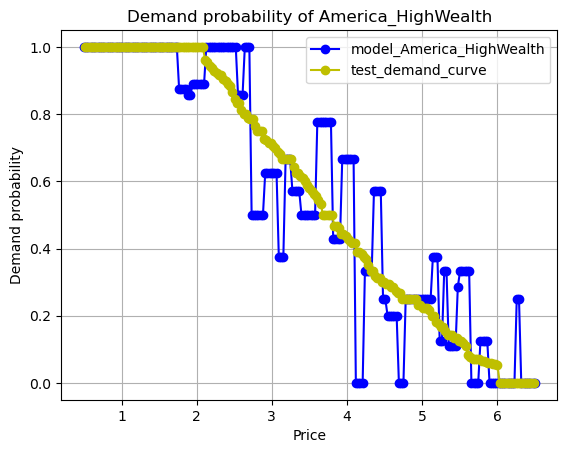

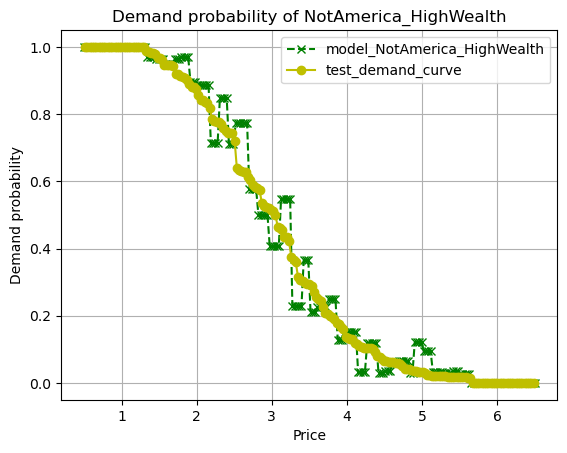

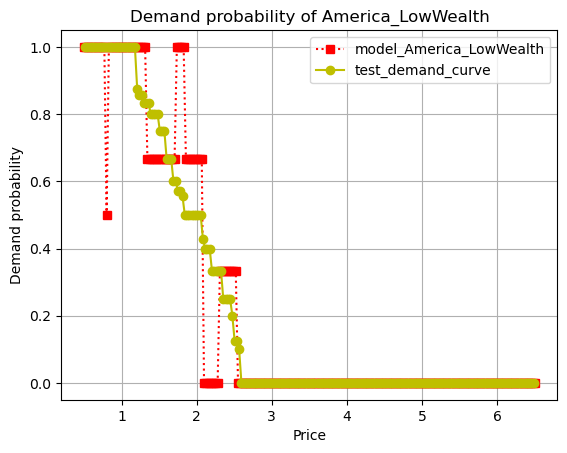

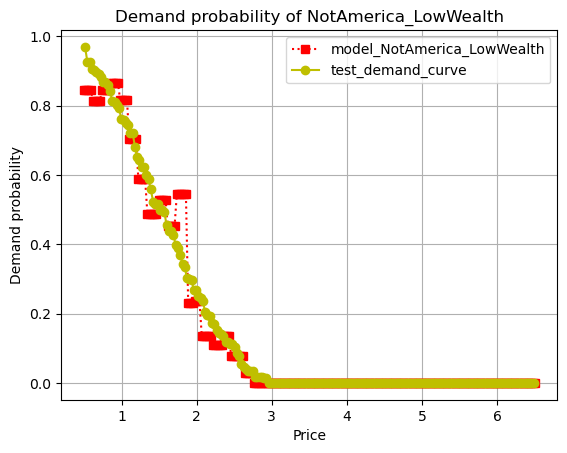

In [32]:
Demand_at_price_naive_with_AH=create_empirical_estimate_demand_df(df_train[(df_train['IsAmerica'] == 1) & (df_train['LowWealth'] == 0)], 50)
Demand_at_price_naive_with_NAH=create_empirical_estimate_demand_df(df_train[(df_train['IsAmerica'] == 0) & (df_train['LowWealth'] == 0)], 50)
Demand_at_price_naive_with_AL=create_empirical_estimate_demand_df(df_train[(df_train['IsAmerica'] == 1) & (df_train['LowWealth'] == 1)], 50)
Demand_at_price_naive_with_NAL=create_empirical_estimate_demand_df(df_train[(df_train['IsAmerica'] == 0) & (df_train['LowWealth'] == 1)], 50)
Demand_naive_AH=[]
Demand_naive_NAH=[]
Demand_naive_AL=[]
Demand_naive_NAL=[]

for price in prices_to_predict:
    Demand_naive_AH.append(get_prediction_empirical(Demand_at_price_naive_with_AH, price))
    Demand_naive_NAH.append(get_prediction_empirical(Demand_at_price_naive_with_NAH, price))
    Demand_naive_AL.append(get_prediction_empirical(Demand_at_price_naive_with_AL, price))
    Demand_naive_NAL.append(get_prediction_empirical(Demand_at_price_naive_with_NAL, price))

    
plt.plot(prices_to_predict, Demand_naive_AH, marker='o', linestyle='-', color='b', label='model_America_HighWealth') 
plt.plot(test_demand_curve_America_HighWealth["Price_bin_mid"], test_demand_curve_America_HighWealth["Demand_at_price"], marker='o', linestyle='-', color='y', label='test_demand_curve') 
plt.xlabel('Price')  
plt.ylabel('Demand probability') 
plt.title('Demand probability of America_HighWealth') 
plt.legend() 
plt.grid(True) 
plt.show() 

plt.plot(prices_to_predict, Demand_naive_NAH, marker='x', linestyle='--', color='g', label='model_NotAmerica_HighWealth')
plt.plot(test_demand_curve_NotAmerica_HighWealth["Price_bin_mid"], test_demand_curve_NotAmerica_HighWealth["Demand_at_price"], marker='o', linestyle='-', color='y', label='test_demand_curve') 
plt.xlabel('Price')  
plt.ylabel('Demand probability') 
plt.title('Demand probability of NotAmerica_HighWealth') 
plt.legend() 
plt.grid(True) 
plt.show() 


plt.plot(prices_to_predict, Demand_naive_AL, marker='s', linestyle=':', color='r', label='model_America_LowWealth')
plt.plot(test_demand_curve_America_LowWealth["Price_bin_mid"], test_demand_curve_America_LowWealth["Demand_at_price"], marker='o', linestyle='-', color='y', label='test_demand_curve') 
plt.xlabel('Price')  
plt.ylabel('Demand probability') 
plt.title('Demand probability of America_LowWealth') 
plt.legend() 
plt.grid(True) 
plt.show() 



plt.plot(prices_to_predict, Demand_naive_NAL, marker='s', linestyle=':', color='r', label='model_NotAmerica_LowWealth')
plt.plot(test_demand_curve_NotAmerica_LowWealth["Price_bin_mid"], test_demand_curve_NotAmerica_LowWealth["Demand_at_price"], marker='o', linestyle='-', color='y', label='test_demand_curve') 
plt.xlabel('Price')  
plt.ylabel('Demand probability') 
plt.title('Demand probability of NotAmerica_LowWealth') 
plt.legend() 
plt.grid(True) 
plt.show() 




In [31]:
pd.options.mode.chained_assignment = None 

### 2b) Pricing

<font color='blue'> Now, use your code from 1c to output predicted optimal prices, predicted revenue, and the actual revenue using the test data curve, for each covariate combination. Your output should have 4 rows, one for each covariate combination.

For example, we got for one of the covariate combinations:

Group Not America, Low Wealth: Optimal price 1.314070, Predicted Revenue 0.913284, True revenue 0.788442

In [39]:
p_AH,r_AH=get_revenue_maximizing_price_and_revenue(prices_to_predict, y_AH)
p_NAH,r_NAH=get_revenue_maximizing_price_and_revenue(prices_to_predict, y_NAH)
p_AL,r_AL=get_revenue_maximizing_price_and_revenue(prices_to_predict, y_AL)
p_NAL,r_NAL=get_revenue_maximizing_price_and_revenue(prices_to_predict, y_NAL)

def output_true_demand(price,df):
    for i in range(len(df["Price_bin"])):
        if price > df["Price_bin"][i].left and price<=df["Price_bin"][i].right:
            return df["Demand_at_price"][i]
    if price<=df["Price_bin"][0].left:
        return df["Demand_at_price"][0]
    elif price>df["Price_bin"][len(df["Price_bin"])-1].right:
        return df["Demand_at_price"][len(df["Price_bin"])-1]

for i in range(len(test_demand_curve_NotAmerica_LowWealth["Price_bin"])):
    test_demand_curve_NotAmerica_LowWealth["Price_bin"][i]=pd.Interval(float(test_demand_curve_NotAmerica_LowWealth["Price_bin"][i].strip("[]()").split(",")[0]),float(test_demand_curve_NotAmerica_LowWealth["Price_bin"][i].strip("[]()").split(",")[1]))

for i in range(len(test_demand_curve_America_LowWealth["Price_bin"])):
    test_demand_curve_America_LowWealth["Price_bin"][i]=pd.Interval(float(test_demand_curve_America_LowWealth["Price_bin"][i].strip("[]()").split(",")[0]),float(test_demand_curve_America_LowWealth["Price_bin"][i].strip("[]()").split(",")[1]))

for i in range(len(test_demand_curve_America_HighWealth["Price_bin"])):
    test_demand_curve_America_HighWealth["Price_bin"][i]=pd.Interval(float(test_demand_curve_America_HighWealth["Price_bin"][i].strip("[]()").split(",")[0]),float(test_demand_curve_America_HighWealth["Price_bin"][i].strip("[]()").split(",")[1]))

for i in range(len(test_demand_curve_NotAmerica_HighWealth["Price_bin"])):
    test_demand_curve_NotAmerica_HighWealth["Price_bin"][i]=pd.Interval(float(test_demand_curve_NotAmerica_HighWealth["Price_bin"][i].strip("[]()").split(",")[0]),float(test_demand_curve_NotAmerica_HighWealth["Price_bin"][i].strip("[]()").split(",")[1]))

    
print("Group America, High Wealth: Optimal price",p_AH,"Predicted Revenue:",r_AH,"True revenue:",output_true_demand(p_AH,test_demand_curve_America_HighWealth)*p_AH)
print("Group Not America, High Wealth: Optimal price",p_NAH,"Predicted Revenue:",r_NAH,"True revenue:",output_true_demand(p_NAH,test_demand_curve_NotAmerica_HighWealth)*p_NAH)
print("Group America, Low Wealth: Optimal price",p_AL,"Predicted Revenue:",r_AL,"True revenue:",output_true_demand(p_AL,test_demand_curve_America_LowWealth)*p_AL)
print("Group Not America, Low Wealth: Optimal price",p_NAL,"Predicted Revenue:",r_NAL,"True revenue:",output_true_demand(p_NAL,test_demand_curve_NotAmerica_LowWealth)*p_NAL)



Group America, High Wealth: Optimal price 3.0929648241206027 Predicted Revenue: 2.2596501291171487 True revenue: 2.1264133165829144
Group Not America, High Wealth: Optimal price 2.399497487437186 Predicted Revenue: 1.8866826107942947 True revenue: 1.7868598310702448
Group America, Low Wealth: Optimal price 1.4346733668341707 Predicted Revenue: 1.0109987388143071 True revenue: 1.1477386934673366
Group Not America, Low Wealth: Optimal price 1.2236180904522613 Predicted Revenue: 0.8153270371855655 True revenue: 0.7963228842625828


<font color='blue'> Suppose each of the 4 covariate combinations make up an equal part of the population. What would be the resulting revenue achieved at test time if you use the optimal price for each group (so you look at their covariates, and then give them the optimal price for that group).

In other words, this answer should be a single number, the mean of the true revenue of the 4 groups.

In [307]:
r1=get_revenue_maximizing_price_and_revenue(test_demand_curve_NotAmerica_LowWealth["Price_bin_right"], test_demand_curve_NotAmerica_LowWealth["Demand_at_price"])[1]
r2=get_revenue_maximizing_price_and_revenue(test_demand_curve_America_LowWealth["Price_bin_right"], test_demand_curve_America_LowWealth["Demand_at_price"])[1]
r3=get_revenue_maximizing_price_and_revenue(test_demand_curve_NotAmerica_HighWealth["Price_bin_right"], test_demand_curve_NotAmerica_HighWealth["Demand_at_price"])[1]
r4=get_revenue_maximizing_price_and_revenue(test_demand_curve_America_HighWealth["Price_bin_right"], test_demand_curve_America_HighWealth["Demand_at_price"])[1]

(r1 + r2 + r3 + r4) / 4

1.5165470690511675

<font color='blue'> Comment on your outputs in no more than 3 sentences. What is the effect of using different prices for differerent covariate groups?

Using different prices for different covariate groups makes much more revenue, now it's more than 1.5, compared with the previous 1.2.
Using the logistic regression model to estimate the average of these four groups, the estimate is around 1.46, while using all data as a group gets the estimate of around 1.23. Using different prices for different covariate groups makes the amount of data for each group less, leading to a bigger difference between the estimate and the real value.

# Problem 3: Pricing under capacity constraints

Now, we are going to build up to implementing the Bellman equation approach discussed in class, to price a single copy of an item to be sold over $T$ time periods. For simplicity, we will use `test_demand_curve` as $d(p)$. 

In [40]:
price_options = list(test_demand_curve.Price_bin_mid)
demand_predictions = list(test_demand_curve.Demand_at_price)

### 3a) Implementing one step of the Bellman equation

Recall the "Bellman equation" taught in class. Suppose we have 1 copy of the item at time $t$. Then, my expected revenue given I price the item at $p_t$ is:
$$ V_t = d(p_t)p_t + (1 - d(p_t))V_{t+1}$$

<font color='blue'> Implement the following function that returns optimal price $p_t$ and the resulting value $V_t$, given the demand curve and $V_{t+1}$. 

For example, we find that the output of the following function call is: (2.083, 1.1922434210526316)

`get_single_step_revenue_maximizing_price_and_revenue(0, price_options, demand_predictions)`

In [42]:
def get_single_step_revenue_maximizing_price_and_revenue(Vtplus1, price_options, demand_predictions):
    maxv=0
    maxp=0
    for i in range(len(price_options)) :
        if price_options[i]*demand_predictions[i]+(1-demand_predictions[i])*Vtplus1 > maxv:
            maxv=price_options[i]*demand_predictions[i]+(1-demand_predictions[i])*Vtplus1
            maxp=price_options[i]
    return maxp,maxv   
        

In [43]:
get_single_step_revenue_maximizing_price_and_revenue(0, price_options, demand_predictions)

(2.083, 1.1922434210526316)

### 3b) Calculating prices over time


<font color='blue'> Implement the following function that returns a list (of length $T$) of optimal prices for each time period, and a expected revenue number for those prices.
    
Hint: your function should loop through each time step, _starting_ at time $t=T-1$ (the last time period, since the first time period is time $t=0$). Each iteration of the loop should call the function from part 3a. Recall that we can define $V_T = 0$, since even if the item is unsold at time $T$, we have finished trying to sell it.

In [47]:
def get_prices_over_time_and_expected_revenue(prices, demand_predictions, T):
    maxp={}
    maxv={}
    for t in range(T-1,-1,-1):
        if t==T-1:
            maxp[t],maxv[t]=get_single_step_revenue_maximizing_price_and_revenue(0, price_options, demand_predictions)
        else:
            maxp[t],maxv[t]=get_single_step_revenue_maximizing_price_and_revenue(maxv[t+1], price_options, demand_predictions)
    return maxp,maxv

<font color='blue'> Plot a line plot for your optimal prices over time when $T=100$ and $T=10$. Also print out the expected revenue using these prices and for each $T$. 

For example, when $T=100$, we find that prices[0] = 5.822, prices[90] = 4.224, and that revenue = 5.2287

In [52]:
maxp,maxv=get_prices_over_time_and_expected_revenue(price_options, demand_predictions, 100)
maxp[0],maxp[90],maxv[0]

(5.822, 4.224, 5.228684354819154)

### 3c) [Bonus, 2 points] Prices over time with multiple copies

<font color='blue'> Now, suppose that you have $K$ copies of the item, that you must sell over a time period $T$. Implement the two-dimensional dynamic program as discussed in class. Plot a line plot where the X axis is time as in 3b, but now you have $K$ lines where each line indicates the price at time $T$ if you have $K$ items left. 
    
Hint: As in 3a and 3b, you may find it useful to first optimize the price $p_{t,k}$ given the values $V_{t+1, k}$, $V_{t+1, k-1}$. Then, have a 2nd function that loops through $t, k$ in an appropriate order. 